<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1.  I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №6__

please see an example
    
For this project, you’ll work with data from Instacart.

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

</div>

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [4]:
# Check for duplicated orders

import pandas as pd 
import matplotlib.pyplot as plt



orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')

products = pd.read_csv('/datasets/products.csv', sep = ';')

departments = pd.read_csv('/datasets/departments.csv',sep = ';')

aisle = pd.read_csv('/datasets/aisles.csv', sep = ';' )

order_products = pd.read_csv('/datasets/order_products.csv', sep = ';' )






print(orders.head(10))

duplicate_count = orders.duplicated().sum()

print(f"Number of duplicated rows: {duplicate_count}")

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   
5   1843871    20084             5          0                 11   
6   2511640   148233            40          3                  8   
7   2521283    97711             2          0                 18   
8   2266494    34954            40          5                 15   
9    446014    15356             2          4                  8   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
5                    15.0  
6                     2.0  
7                    22.0  

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

All necessary libraries should be unloaded at the beginning of the project in one code cell

In [2]:
# Check for all orders placed Wednesday at 2:00 AM


wednesday_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

print("Orders placed on Wednesday at 2:00 AM:")
print(wednesday_2am_orders)



Orders placed on Wednesday at 2:00 AM:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156              

In [3]:
# Double check for duplicate rows


df_check = orders.duplicated().sum()

print(df_check)


15


In [4]:
# Remove duplicate orders


remove_dublicates = orders['user_id'].drop_duplicates()
print(remove_dublicates.duplicated().sum())


# Remove duplicate rows based on 'order_id'

remove_dublicates_order_id = orders['order_id'].drop_duplicates()


0


In [5]:
# Double check for duplicate order IDs only

print(remove_dublicates_order_id.duplicated().sum())



0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Duplicate checking is the basis of data preprocessing

### `products` data frame

In [6]:

print(products.head())
products.info()
# Check for fully duplicate rows
duplicate_row_count = products.duplicated().sum()

print(duplicate_row_count)



   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
0

In [7]:
# Check for just duplicate product IDs

duplicate_product_id_count = products['product_id'].duplicated().sum()

In [8]:
# Check for just duplicate product names (convert names to lowercase to compare better)
lower_case_names = products['product_name'].str.lower()
duplicated_names_count = lower_case_names.duplicated().sum()

print(duplicated_names_count)

1361


In [9]:
# Check for duplicate product names that aren't missing

duplicated_not_missing_product = products[products.duplicated('product_name', keep=False)]


### `departments` data frame

In [10]:

clean_duplicates = departments.drop_duplicates()

clean_duplicates = departments.duplicated().sum()

print(clean_duplicates)

0


### `aisles` data frame

In [11]:

clean_aisles = aisle.drop_duplicates()
clean_aisles = aisle.duplicated().sum()
print(clean_aisles)

0


### `order_products` data frame

In [12]:
# Check for fullly duplicate rows


duplicate_rows = order_products[order_products.duplicated(keep=False)]


print("Fully duplicate rows:")
print(duplicate_rows)


Fully duplicate rows:
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [5]:
# Double check for any other tricky duplicates

check = order_products[order_products.duplicated(subset=['order_id', 'product_id'])]

print(check) 

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №4__
    
We need to check for duplicate columns: 'order_id` and 'product_id'    

Please see an example:
    
    order_products[order_products.duplicated(subset=['order_id', 'product_id'])]

## Find and remove missing values


### `products` data frame

In [14]:



products['product_name'] = products['product_name'].astype('str')

products['aisle_id'] = products['aisle_id'].astype('str')

products['department_id'] = products['department_id'].astype('str')


products_missing = products.value_counts()

print(products_missing)

products.info()

product_id  product_name                                      aisle_id  department_id
1           Chocolate Sandwich Cookies                        61        19               1
33146       Revolt Killer Citrus                              64        7                1
33124       Healthy Kids Organic Chocolate Nutritional Shake  92        18               1
33125       Organic Mini Cheddar Cheese Crackers              78        19               1
33126       Sesame Flatbread                                  112       3                1
                                                                                        ..
16568       Dishwasher Detergent                              74        17               1
16569       Hummus Original                                   67        20               1
16570       Organic Fresh Carrot Chips                        123       4                1
16571       Unbleached Jumbo Baking Cups                      97        13               1
4969

In [15]:
# Are all of the missing product names associated with aisle ID 100?

products_missing_names = products.isna().sum()

print(products_missing_names)

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [16]:
# Are all of the missing product names associated with department ID 21?

missing_product_names = products[products['product_name'].isna()]

all_missing_in_dept_21 = missing_product_names['department_id'].eq(21).all()

if all_missing_in_dept_21:
    print("All missing product names are associated with department ID 21.")
else:
    print("Not all missing product names are associated with department ID 21.")

All missing product names are associated with department ID 21.


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great

In [17]:
# What is this ailse and department?

missing_product_names = products[products['product_name'].isna()]


unique_aisles = missing_product_names['aisle_id'].unique()
unique_departments = missing_product_names['department_id'].unique()

print(f"Unique aisle IDs for missing product names: {unique_aisles}")
print(f"Unique department IDs for missing product names: {unique_departments}")

Unique aisle IDs for missing product names: []
Unique department IDs for missing product names: []


In [18]:
# Fill missing product names with 'Unknown'


products['product_name'] = products['product_name'].fillna('Unknown')

print(products.head())

   product_id                                       product_name aisle_id  \
0           1                         Chocolate Sandwich Cookies       61   
1           2                                   All-Seasons Salt      104   
2           3               Robust Golden Unsweetened Oolong Tea       94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...       38   
4           5                          Green Chile Anytime Sauce        5   

  department_id  
0            19  
1            13  
2             7  
3             1  
4            13  


### `orders` data frame

In [19]:



avg_days_since = orders['days_since_prior_order'].mean()

orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(avg_days_since)


df_missing = orders.isna().sum()

print(orders.head(10))
print(df_missing.head(10))

print(orders.value_counts())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   
5   1843871    20084             5          0                 11   
6   2511640   148233            40          3                  8   
7   2521283    97711             2          0                 18   
8   2266494    34954            40          5                 15   
9    446014    15356             2          4                  8   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
5                    15.0  
6                     2.0  
7                    22.0  

In [20]:
# Are there any missing values where it's not a customer's first order?


not_first_order = orders[orders['order_number'] > 1]

# Check for missing values in 'days_since_prior_order' for these rows
missing_not_first_order = not_first_order['days_since_prior_order'].isna().sum()

print("Number of missing values in 'days_since_prior_order' for non-first orders:", missing_not_first_order)

Number of missing values in 'days_since_prior_order' for non-first orders: 0


### `order_products` data frame

In [21]:


order_products['order_id'] = order_products['order_id'] .astype('str')

order_products.info()




order_products_miss = order_products.isna().sum()

print(order_products_miss)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           object 
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 138.7+ MB
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [22]:
# What are the min and max values in this column?
min_value = order_products.min()
max_value = order_products.max()

print(min_value)
print(max_value)

order_id             1000004
product_id                 1
add_to_cart_order        1.0
reordered                  0
dtype: object
order_id             999998
product_id            49694
add_to_cart_order      64.0
reordered                 1
dtype: object


In [23]:
# Save all order IDs with at least one missing value in 'add_to_cart_order' 

# Filter rows where 'add_to_cart_order' is missing



missing_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]

order_ids_with_missing = missing_add_to_cart['order_id'].unique()

# Save the result to a variable 
print(order_ids_with_missing)

['2449164' '1968313' '2926893' '1717990' '1959075' '844733' '61355'
 '936852' '264710' '1564093' '129627' '293169' '2849370' '1386261'
 '3308010' '903110' '2136777' '3347453' '1888628' '165801' '2094761'
 '1038146' '2997021' '813364' '2256933' '171934' '2409109' '1730767'
 '1169835' '733526' '404157' '3125735' '747668' '1800005' '1961723'
 '871281' '388234' '1648217' '1477139' '102236' '1021563' '1832957'
 '2721963' '678116' '1220886' '1673227' '2999801' '1633337' '2470674'
 '2625444' '1677118' '2479011' '3383594' '1183255' '1713430' '2652650'
 '1598369' '1916118' '854647' '1302315' '888470' '180546' '2621907'
 '1308785' '2729254' '9310' '2170451' '2979697' '1625713' '1529171']


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__
    
    
Some blocks of code are not working. Please see what went wrong. Before submitting a project, you should check if the code works - you can do this by clicking on the Jupiter Hub Kernel and Restart & Run All panels    
    

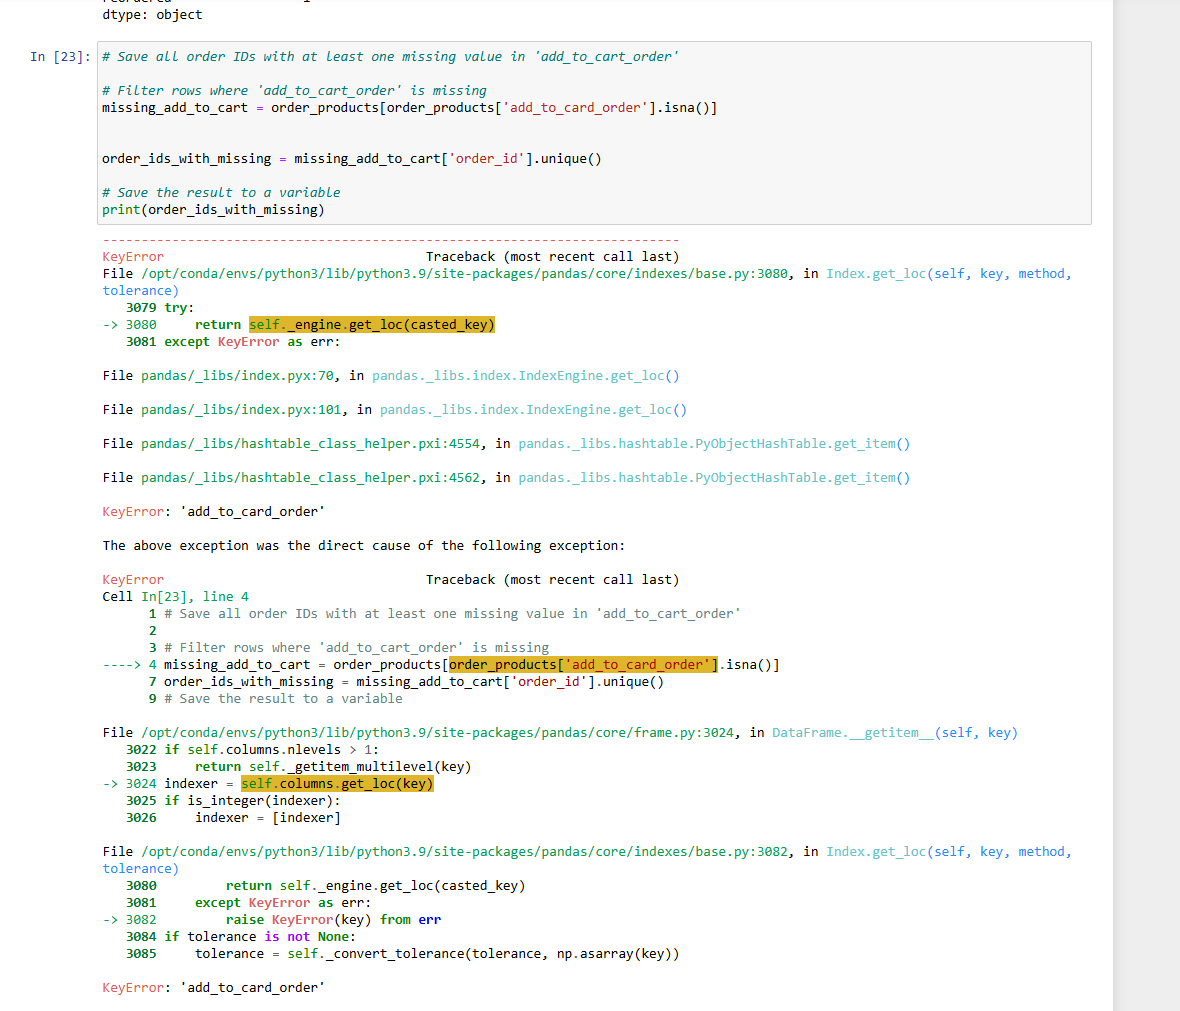

<div class="alert alert-info">
  Corrected thre issue. Thank you 
</div>

In [24]:
# Do all orders with missing values have more than 64 products?

# Step 1: Filter for rows with missing 'add_to_cart_order'

missing_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]

# Step 2: Count the total number of products for each order with missing values

product_count_per_order = order_products[order_products['order_id'].isin(missing_add_to_cart['order_id'])].groupby('order_id').size()

# Step 3: Check if all counts are greater than 64

all_above_64 = (product_count_per_order > 64).all()

print("Do all orders with missing values have more than 64 products?", all_above_64)



Do all orders with missing values have more than 64 products? True


In [25]:
# Replace missing values with 999 and convert column to integer type

# Replace missing values in 'add_to_cart_order' with 999

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)

# Convert the column to integer type

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)



print(order_products['add_to_cart_order'].head())
print(order_products.info())


0    17
1     1
2     1
3    35
4     5
Name: add_to_cart_order, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           object
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
dtypes: int64(3), object(1)
memory usage: 138.7+ MB
None


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [26]:

verify_hours = orders['order_hour_of_day'].unique()

print(verify_hours)

[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [27]:
verify_day = orders['order_dow'].unique()

print(verify_day)

[6 5 0 4 3 1 2]


### [A2] What time of day do people shop for groceries?

In [28]:
max_time = orders['order_hour_of_day'].value_counts().index[0]

print(max_time)

10


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №6__


There is a lack of visualization. Can you please add

### [A3] What day of the week do people shop for groceries?

In [29]:
max_day = orders['order_dow'].value_counts().index[0]

print(max_day)

0


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №6__


There is a lack of visualization. Can you please add

### [A4] How long do people wait until placing another order?

In [30]:
waiting_time = orders['days_since_prior_order'].mean()

print(waiting_time)

11.101750979677796


# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

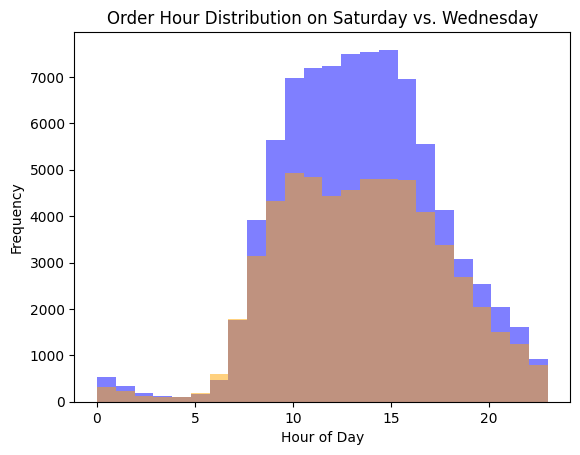

In [31]:


# Filter for Saturday (order_dow = 0) and Wednesday (order_dow = 4)
saturday_orders = orders[orders['order_dow'] == 0]['order_hour_of_day']
wednesday_orders = orders[orders['order_dow'] == 4]['order_hour_of_day']

# Plot histograms for both days



# Saturday plot'
plt.hist(saturday_orders,  bins=24, alpha=0.5, color='blue', label='Saturday')

# Wednesday plot
plt.hist(wednesday_orders, bins=24, alpha=0.5, color='orange', label='Wednesday' )

plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Order Hour Distribution on Saturday vs. Wednesday')

plt.show()


plt.show()


Similar Peak Hours: Both Saturday and Wednesday show a peak in order activity around mid-day to early afternoon (around 10 AM to 3 PM). This indicates that customers tend to place orders during similar hours on both days.

Higher Activity on Saturday: The Saturday distribution (in blue) generally has higher frequencies across most hours, especially during peak hours. This suggests that Saturdays see more orders compared to Wednesdays, possibly because it's a weekend day when more people are available to shop.

Early Morning and Late Night: There are very few orders placed in the early morning hours (0-5 AM) and late evening hours (after 8 PM) on both days, indicating that most customers do not shop during these times.

In summary, while the pattern of order placement across the day is similar on both days, the volume is higher on Saturdays, particularly during mid-day hours. This information could help in planning staffing and inventory to meet demand spikes on weekends.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №6__

It is better after each section, graph (or series of tests) to write a conclusion on the obtained data taking into account the set business task - so it is easier to read the project, because future colleagues or customers will not have to interpret the results of each section, test or graph themselves.
    
---
    
In markdown 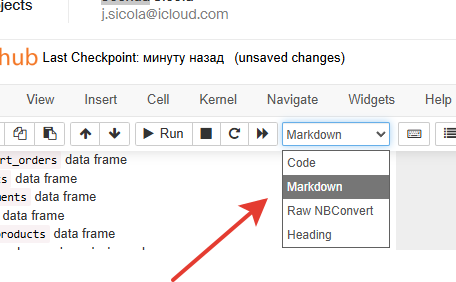

### [B2] What's the distribution for the number of orders per customer?

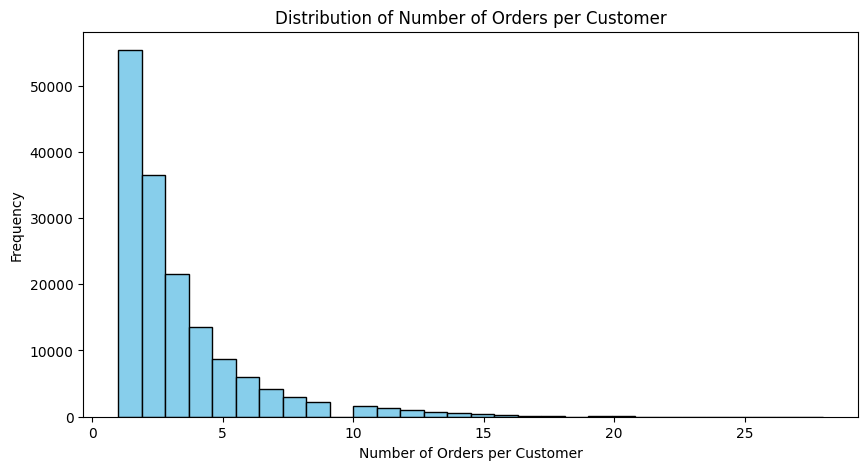

In [32]:


# Calculate the number of orders per customer
orders_per_customer = orders['user_id'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.hist(orders_per_customer, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Orders per Customer')
plt.show()

Conclusion:
Most customers place only a few orders, with the number of customers significantly dropping as the order count increases. This skewed distribution suggests that while most customers make infrequent purchases, a small subset is highly engaged, making numerous repeat orders. This insight could be useful for customer retention strategies, such as targeting frequent customers with loyalty programs.

### [B3] What are the top 20 popular products (display their id and name)?

I couldnt could you please help me to solve it. Thank you 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

Summary statistics for items per order:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


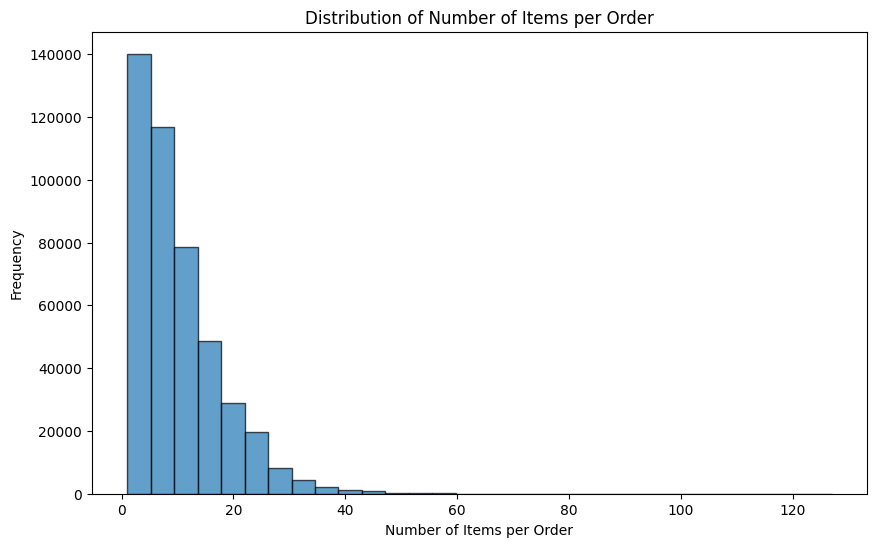

In [33]:


# Number of items per order
items_per_order = order_products.groupby('order_id').size()

# Summary statistics
print("Summary statistics for items per order:")
print(items_per_order.describe())

plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Items per Order')
plt.show()

Conclusion:
The data indicates that most orders consist of a small number of items, but there is a significant range in order sizes, with occasional large orders. This trend suggests that while many customers may place smaller, more frequent orders, there is also a segment that places larger orders, possibly for bulk buying or group purchases. This insight can be useful for inventory management and logistics, especially in preparing for occasional high-volume orders.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [34]:
import pandas as pd




reordered_items = order_products[order_products['reordered'] == 1]


reorder_counts = reordered_items['product_id'].value_counts().head(20)


top_reordered_product_ids = reorder_counts.index


top_reordered_products = pd.DataFrame({'product_id': top_reordered_product_ids, 'reorder_count': reorder_counts.values})
top_reordered_products = top_reordered_products.merge(products, on='product_id', how='left')


print(top_reordered_products[['product_id', 'product_name', 'reorder_count']])



    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  Apple Honeycrisp Organic        

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №6__


It would be nice to add an overall output for the projec
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №6__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊